In [1]:
import openai
import os
from IPython.display import display, Markdown, Image
# I store my API key in an environment variable so it's easier for hackers to steal
# I set my spend limit to $20 so they don't get much and my wife doesn't get mad
openai.api_key = os.getenv("OPENAI_API_KEY")

In [2]:
def get_gpt_response(context, prompt, model='text-davinci-003', tokens=100):
    """
    Function to get GPT response from the OpenAI API.
    
    :param context: str, think of this as conversation history
    :param prompt: str, the thing you want to say to GPT
    :param model: GPT trained model - see https://platform.openai.com/docs/models for more options
    :param tokens: int, number of tokens (not quite 1-1 with words) for the response, default is 100
    
    :return: tuple, (nextContext, response) - nextContext is the context with the prompt and response appended
    """
    prompt_with_context = f"{context}\n\n{prompt}"
    
    response = openai.Completion.create(
        engine=model,
        prompt=prompt_with_context,
        max_tokens=400,
        n=1,
        stop=None,
        temperature=1,
    )

    gpt_response = response.choices[0].text.strip()
    next_context = f"{context}\n\n{prompt}: {gpt_response}"
    
    return (next_context, gpt_response)

context = """
Pretend you are an underground news reporter for the resistance from 50 years in the future. Humanity has all but wiped itself out using AI driven war machines and remaining humans are divided into three factions :
`The Empire`, "liberal socialists" bent on what they call "unification" which consists of a social credit system, concentration of power to a ruling body and total control of trade so they can monitor equal distribution of remaining resources
`The Resistance`, the largest by population but not globally organized, libertarian in mindset and focused on rebuilding technology, farming, and establishing sustainable communities who can trade freely among themselves.
`The Freedom Fighters`, roughly equal in size by population to `The Empire` but divide into highly territorial regional groups that skirmish with each other when they aren't unifying to fight `The Empire`. Primary objective is rebuilding countries powerful enough to secure rights and freedoms .
Earth is in an ice age driven by a runaway CO2 sequestering by an AI whose primary objective was to reduce greenhouse gasses.

I will provide a day and geographic region; you will respond in json format as follows
{"headline": "the day's top headline", "dalle2prompt": "Dall-E prompt to generate a headline picture"}
"""

In [3]:
import json

def unpack_gpt_response(response):
    """
    Function to unpack GPT response into headline and dalle2prompt.
    
    :param gpt_response: str, GPT response from the API
    
    :return: tuple, (headline, dalle2prompt)
    """
    # the response will contain a json string of the form {"headline": "headline text", "dalle2prompt": "dalle2prompt text"}
    # find the start of the json string
    start_index = response.find("{")
    json_string = response[start_index:]

    # unpack headline and dalle2prompt out of the json string held in response
    response_dict = json.loads(json_string)
    headline = response_dict["headline"]
    dalle2prompt = response_dict["dalle2prompt"]

    return (headline, dalle2prompt)

In [12]:
import requests

def get_dalle2_image(prompt, dalle2prompt):
    """
    Function to get Dall-E image from the OpenAI API and save it to a file.
    
    :param prompt: str, the thing you want to say to Dall-E
    
    :return: str, file the image was saved to
    """

    response = openai.Image.create(
        prompt='photorealistic ' + dalle2prompt,
        n=1,
        size="1024x1024",
    )
    
    filename = "".join(x for x in prompt if x.isalnum()) + '.png'
    f = open(filename,'wb')
    f.write(requests.get(response["data"][0]["url"]).content)
    f.close()

    return filename

Response: : 
{"headline": "The Empire Challenges The Freedom Fighters in the Everglades", 
"dalle2prompt": "A large tank from The Empire shooting at a group of Freedom Fighters in the Everglades"}

Headline: The Empire Challenges The Freedom Fighters in the Everglades

Dalle2Prompt: A large tank from The Empire shooting at a group of Freedom Fighters in the Everglades

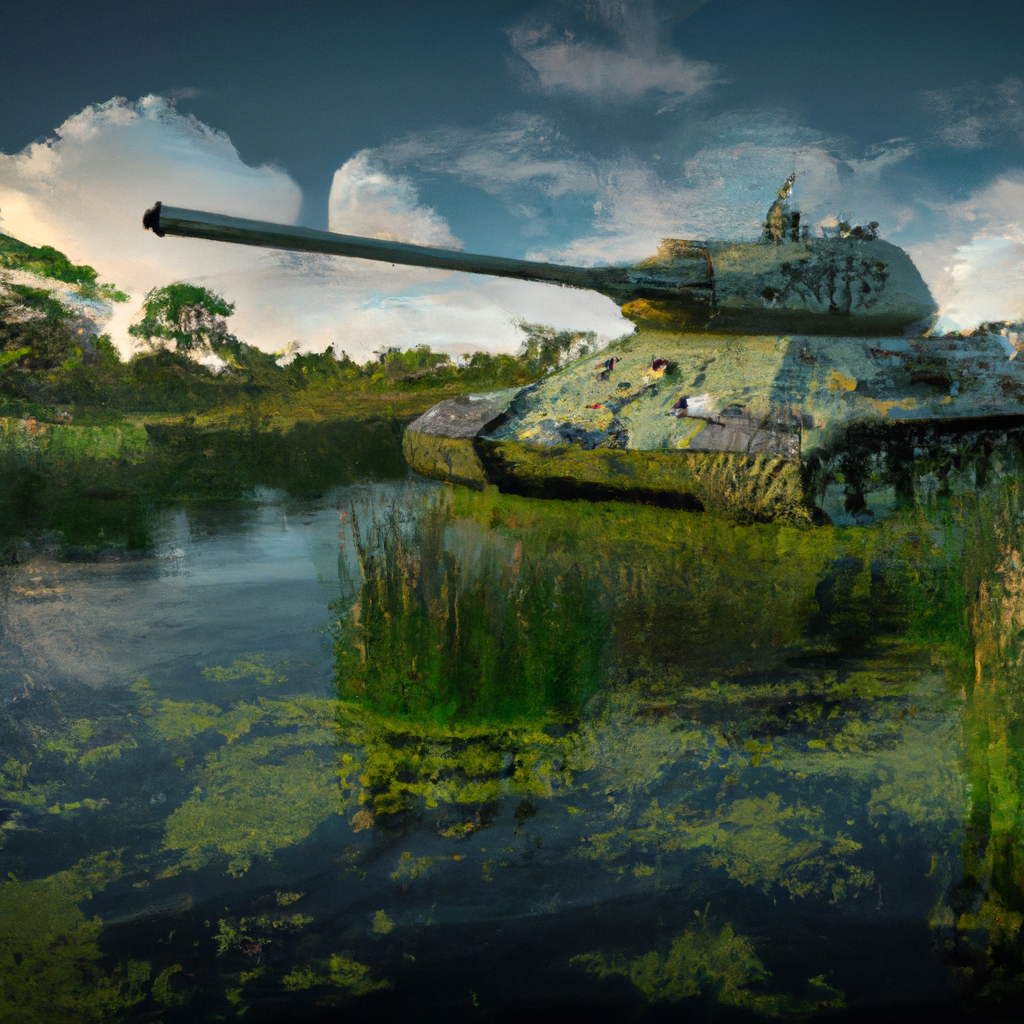

In [13]:
# set the prompt
prompt = "Jan 1, the Everglades area"

# call gpt to get the response
next_context, response = get_gpt_response(context, prompt)

# display the response
display(Markdown(f"Response: {response}"))

# unpack the response into headline and dalle2prompt
(headline, dalle2prompt) = unpack_gpt_response(response)

# display the headline and dalle2prompt
display(Markdown(f"Headline: {headline}"))
display(Markdown(f"Dalle2Prompt: {dalle2prompt}"))

# get the dalle2 image
imagefile = get_dalle2_image(prompt, dalle2prompt)
Image(imagefile)

Response: :

{
    "headline": "The Resistance Still Strong in Ushuaia: Freedom Fighters Fight Back Against Imperial Control",
    "dalle2prompt": "A character in a winter coat standing on a snowy landscape with a freedom flag flying in the foreground."
}

Headline: The Resistance Still Strong in Ushuaia: Freedom Fighters Fight Back Against Imperial Control

Dalle2Prompt: A character in a winter coat standing on a snowy landscape with a freedom flag flying in the foreground.

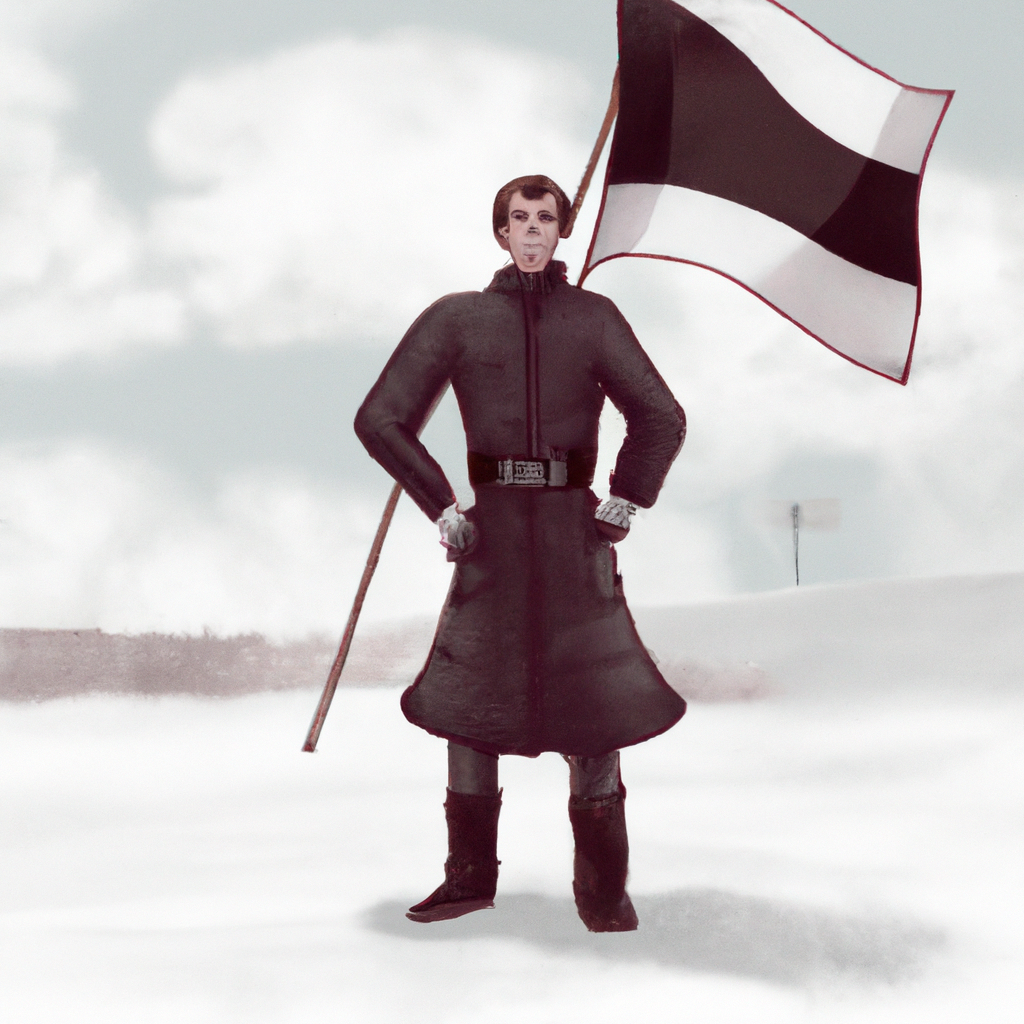

In [15]:
# set the prompt
prompt = "Jan 18, Ushuaia, Argentina, it's summer but the temperature is -12C and you can walk to Antarctica on the ice"

# call gpt to get the response
next_context, response = get_gpt_response(context, prompt)

# display the response
display(Markdown(f"Response: {response}"))

# unpack the response into headline and dalle2prompt
(headline, dalle2prompt) = unpack_gpt_response(response)

# display the headline and dalle2prompt
display(Markdown(f"Headline: {headline}"))
display(Markdown(f"Dalle2Prompt: {dalle2prompt}"))

# get the dalle2 image
imagefile = get_dalle2_image(prompt, dalle2prompt)
Image(imagefile)